In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

# Unsupervised Machine Learning  and Clustering


<h2 id="tocheading">Table of Contents</h2>
<div id="toc"></div>


The story so far:

- Linear Discriminant Analysis (LDA) and Fisher's linear discriminant
- Principal Component Analysis (PCA)
- Feature Selection


Notations:

* Uppercase letters such as $X$ or $Y$ denote generic aspects of a variable (i.e. the actual random variable)
* Observed values are written in lowercase. The ith observed value of $X$ is written as $x_i$
* Matrices are written in bold uppercase letters as in $\mathbf{X}$
* Observations map as *rows* in the matrix while the observed variables are the *columns*.

So if I measure two observables $p = 2$ the size and weight of $N = 100$ people, I get a $N \times p$ matrix $\mathbf{X}$.
One observation in that matrix is denoted as $x_i = [ size, weight ]$ while all observations of the variable size are denoted by $\mathbf{x}_j$ 


So far we have been occupied with 
predicting the values of one or more outputs or response variables $Y = (Y_1, \ldots, Y_m)$ for a given set of input or predictor variables $X = (X_1, \ldots , X_p)$. 

One possible definition of supervised machine learning

> Given a $N \times p$ matrix $\mathbf{X}$ and some associated output vector $\mathbf{Y} \in \mathbb{R}^N$,
 find a function $f(X) = \hat{Y}$ that takes a vector $X \in \mathbb{R}^p$ and returns a prediction for $\hat{Y}$
 where some "loss function" $L(Y, f(X))$ is minimized for all $X$.
 
We've tried to split points into different classes by finding a decission function which seperates the points in an "optimal" way. This process is often called __classification__

In __regression__ the dependent variable is not discrete but a continous value. The problem remains similar however. From *known* input data we try to find a function which accurately predicts $Y \in \mathbb{R}$.

In __unsupervised__ machine learning problems the output vector $\mathbf{y}$ is *unknown*.

In [2]:
%matplotlib inline
from ml import plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
pd.options.display.max_rows = 10

discrete_cmap = LinearSegmentedColormap.from_list('discrete', colors = [(0.8, 0.2, 0.3), (0.98, 0.6, 0.02), (0.1, 0.8, 0.3), (0, 0.4, 0.8), ], N=4)

plots.set_plot_style()

## Classification Example (Iris)

The sterotypical machine learning data set. Given some measurements from flower petals is it possible to deduce the species for a new sample of measurements?

Originally published in 1936 by Ronald Fisher in his paper about LDA. 

<table style="width:100%">
  <tr>
    <td><img src="./ml/images/setosa.jpg" alt="Drawing" style="width: 200px;"/></td>
    <td><img src="./ml/images/versicolor.jpg" alt="Drawing" style="width: 200px;"/></td> 
    <td><img src="./ml/images/virginica.jpg" alt="Drawing" style="width: 200px;"/></td>
  </tr>
</table>

<p style="color:gray"> Iris flower data set. (2017, October 24). In Wikipedia, The Free Encyclopedia.  <p>

Length and width of the petals and sepals making the dataset four dimensional.  Measurements where taken in Canada by Botanist Edgar Anderson:

> all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus

The label vector $\mathbf{y}$ is known because the botanist categorized the flowers into species.

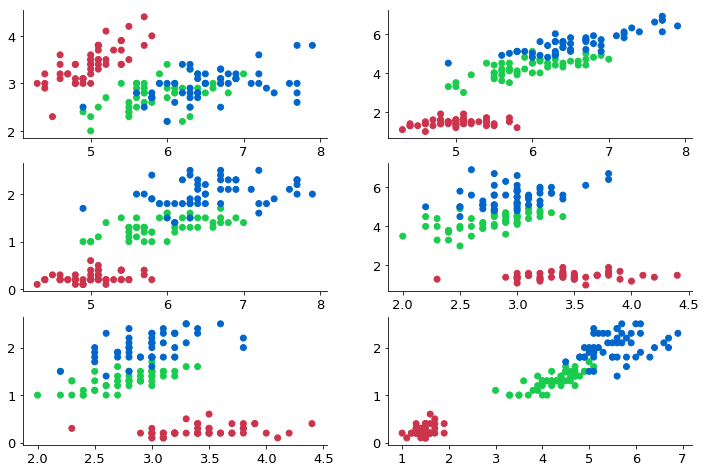

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

f, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap, label='species')
ax2.scatter(X[:, 0], X[:, 2], c=y, cmap=discrete_cmap)
ax3.scatter(X[:, 0], X[:, 3], c=y, cmap=discrete_cmap)
ax4.scatter(X[:, 1], X[:, 2], c=y, cmap=discrete_cmap)
ax5.scatter(X[:, 1], X[:, 3], c=y, cmap=discrete_cmap)
ax6.scatter(X[:, 2], X[:, 3], c=y, cmap=discrete_cmap)

The question this data set can help us answer is:

> What species does this flower likely belong to.

## Regression Example (Boston Housing)

A typical example of a regression task. Given some information about housing in the larger Boston area try and predict the price of the object.

There are 14 attributes in each case of the dataset. They are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- LSTAT - percent lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's


In [4]:
from sklearn.datasets import load_boston
houses = load_boston()
names = list(houses.feature_names) +  ['price']
data = pd.DataFrame(data=np.c_[houses['data'], houses['target']], columns=names)

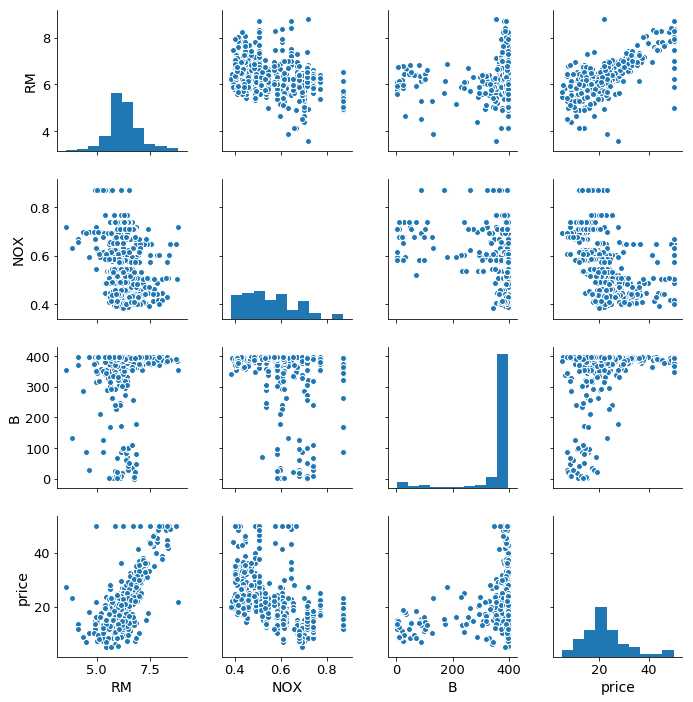

In [5]:
sns.pairplot(data[['RM', 'NOX', 'B', 'price']])

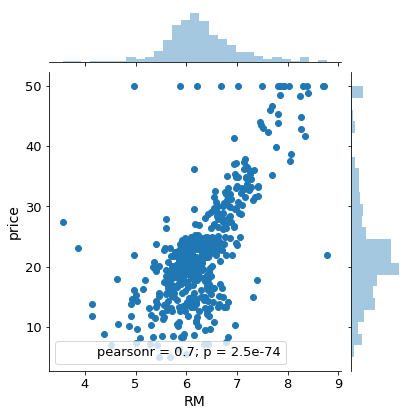

In [6]:
sns.jointplot(data.RM, data.price, kind='scatter')

The question this data set can help us answer is:

> What is the price of a house based on geographical criteria 

## Unsupervised Learning

In unsupervised learning we have no given $Y$.

These methods try to find the underlying (joint) probability density $Pr(X)$ so that we might learn some properties about it.

One common question is whether $X$ is created by a mixture of two or more underlying random variables.

In simpler terms:

 - Given some points, can we infer something about the underlying distributions or labels


### Clustering

Clustering algorithms try to find modes of $Pr(X)$ based on densities, neighbourhood relations or any other measure of 'similarity'  between points.

More generally speaking to quote wikipedia again:

>Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).


In the example below an unknown number of gaussian distributions are sampled to create a scatter plot.

Can one infer $Pr(X)$ by looking at $X$, i.e. the blue dots?

In this case we know that this distribution of blue dots, $X$, was created by sampling $k$ two dimensional gaussians with known standard deviation.
This is just what 

    X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)
 
does.
We even know in what region of space we have to look for to find the centroids centroids of these blobs. 

Questions: 

   - How many blobs do we have?
   - Which points belong to which?

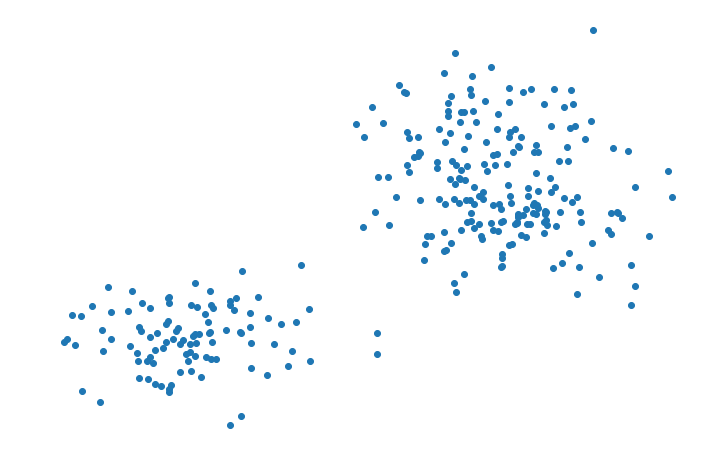

In [7]:
np.random.seed(1234)
from sklearn.datasets import make_blobs

# choose a random number between 1 and 3
k = np.random.randint(1, 4)

# create k blobs 
X, y = make_blobs(n_samples=300, centers=k, center_box=(-2, 2), cluster_std=0.5)

# plot points without any color coding.
plt.scatter(X[:, 0], X[:, 1])
plt.axis('off')
None

If you guessed k=2, you're wrong.

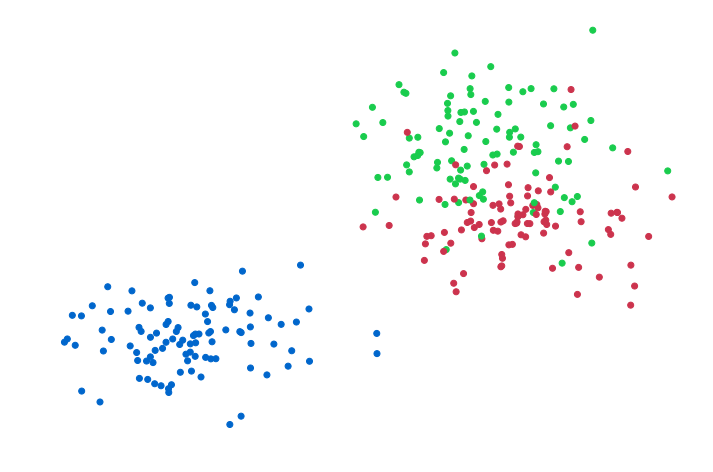

In [8]:
#plot the same points this time with color coding 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap)
plt.axis('off')
None

### K-Means Algorithm

The k-Means algorithm tries to find a partition of the data into $k$ clusters $S = \{S_1, \ldots, S_k\}$  which minimize the variance within those clusters. The number of clusters $k$ has to specified by the user.

Formally speaking the algorithm solves
$$
{\underset {S}{\operatorname {arg\,min} }}\sum _{S_i \in S}\sum _{x \in S_{i}}\left\|x -{\overline{x}}_{S_i}\right\|^{2}.
$$


This problem is similar in nature to that of feature selection. A minimization over all possible subsets of the points $S$. Solving the general optimization problem is NP-Hard and therefore intractable. 

In simpler terms, it would take too long to find the optimal solution in the general case. 
Again there is a popular greedy heuristic which is usualy used to solve the problem.

#### Loyds Algorithm

Loyds Algorithm (sometimes also simply called *the* k-means algorithm) finds a local optimum using a greedy heuristic.

It does so iterativly according to the following steps 

1. Pick some initial cluster means (or centroids) $\{m_1, \ldots, m_k \}$ either randomly or according to some heuristic.

2. Create a partition $S$  by assigning each point $x \in X$ to the cluster $S_i$ where the distance to $m_i$ is the smallest.

3. Update the cluster means by calculating the means within the assigned clusters. 

4. Repeat steps 2 and 3 until convergence.

One popular convergence is the total change in cluster centroids per iteration. If the cluster centroids do not change from one iteration to the next, return the cluster centroids.


The example below shows a k-mean clustering on $k=3$ random blobs.


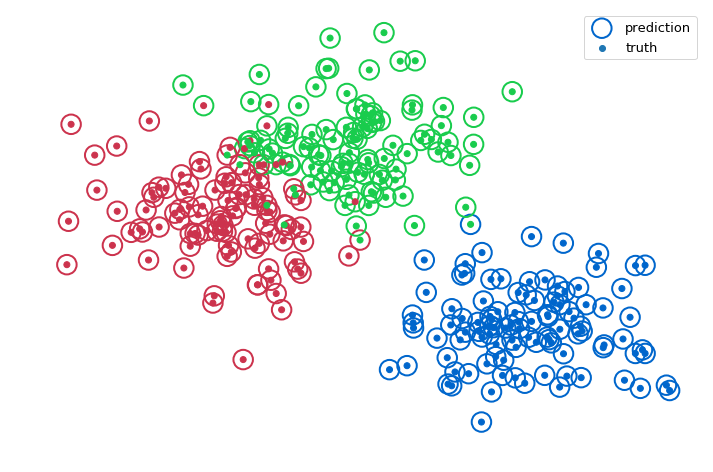

In [9]:
np.random.seed(1234)
from sklearn.cluster import KMeans

# create three random blobs
X, y = make_blobs(n_samples=300, centers=3, center_box=(-2, 2), cluster_std=0.5)

# use KMeans to predict clusters for each sample in X
prediction = KMeans(n_clusters=3).fit_predict(X)

# shift labels to get the right colors
prediction = np.choose(prediction, [3, 0, 2])

# plot rings with predicted clusters
plt.scatter(X[:, 0], X[:, 1], facecolor='', edgecolors=discrete_cmap(prediction), lw=2,  s=380, label='prediction')

# plot points with true cluster associations
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap, label='truth')
plt.legend(loc='upper right')
plt.axis('off')
None

Below you can see an animation of k-Means as it converges. The black hexagons indicate the cluster centroids in the corresponding iteration. 

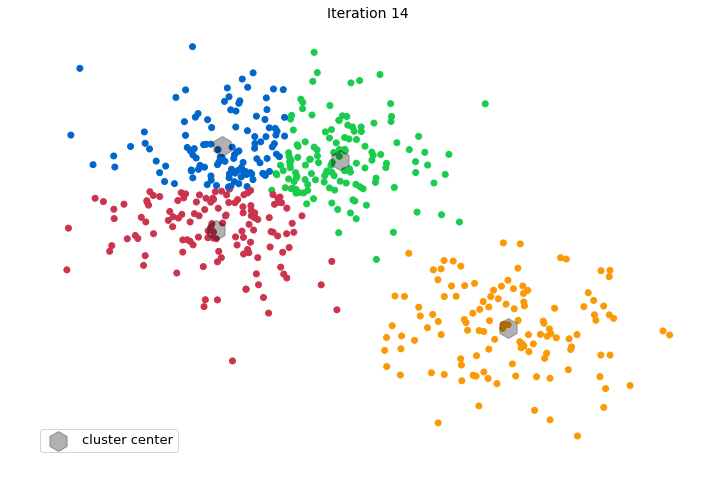

In [10]:
from IPython import display

# create 4 clsuters
k = 4

# choose inital cluster centers
X, y = make_blobs(n_samples=500, centers=k, center_box=(-2, 2), cluster_std=.5, random_state=1234)

fig = plt.figure()
ax = fig.add_subplot(111)

init_centers = np.array([[0, 0], [1, 1], [1, 2], [1, 3]])

# loop over each iteration. do it 5 times
for i in np.tile(range(1, 15), 5):
    kmeans = KMeans(n_clusters=4, init=init_centers, max_iter=i).fit(X)
    
    ax.cla()
    ax.set_title('Iteration {}'.format(i))
    
    ax.scatter(X[:,0], X[:,1],c=kmeans.labels_, cmap=discrete_cmap)
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', marker='h', s=400, alpha=0.3,  label='cluster center')
    
    ax.legend(loc=3)
    ax.axis('off')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())

plt.close()
    

If the number of clusters in the center is not known, the algorithm does not produce meaningful results.
This is a serious limitation as the number of clusters in the data is rarely known.  


In the example below we sample two uniform 2D distributions and use k-means to cluster them into $k=4$ regions.


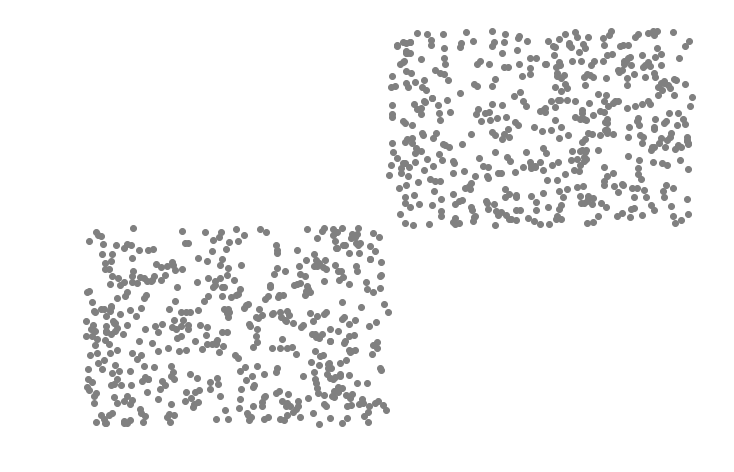

In [11]:
u1 = np.random.uniform(-1, 0, size=(500, 2))
u2 = np.random.uniform(0, 1, size=(500, 2))
X = np.append(u1, u2, axis=0)
plt.scatter(X[:, 0], X[:, 1], color='gray')
plt.axis('off')
None

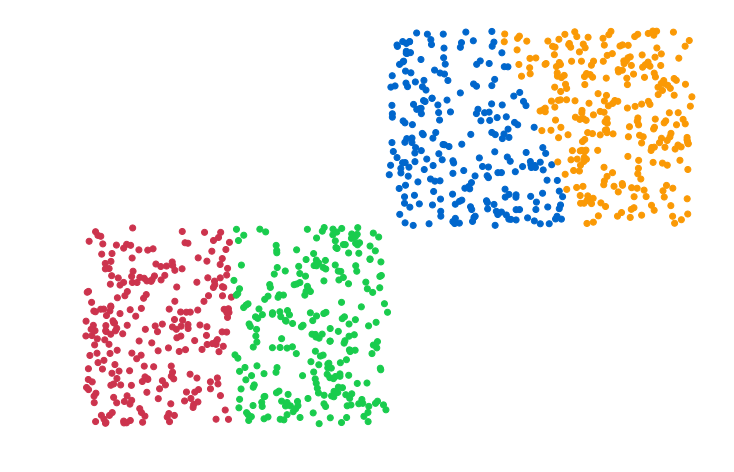

In [12]:
# use KMeans to predict clusters for each sample in X using the deliberatley wrong value of k=4
prediction = KMeans(n_clusters=4).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

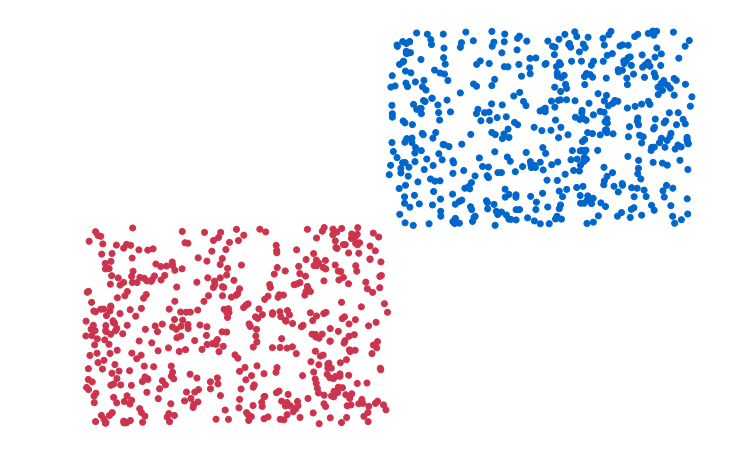

In [13]:
# use KMeans to predict clusters for each sample in X this time using the correct value for k=2
prediction = KMeans(n_clusters=2).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

The k-Means algorithm works well on convex clusters with similar standard deviations. But it fails on elongated or concave shapes.

Like all cluster algorithms k-Means has a number of advantages and disadvantages

Pros:

 - Relatively fast
 - Predictable results when inital cluster centroids are fixed.
 - works well on convex and 'blob' like shapes

Cons:

 - Number of clusters has to be known beforehand
 - Gets worse and slower in high dimensions
 
The follwing snippet transforms two random blobs to be elongated along the x axis.
In this case k-Means fails as the neighborhood relation does not yield meaningful results.

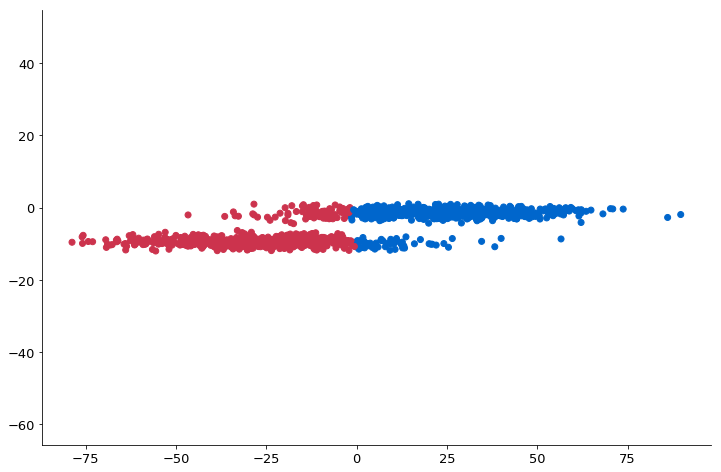

In [14]:
X, y = make_blobs(n_samples=1300, centers=2, random_state=2)
transformation = [[20, 0], [0, 1]]
X = np.dot(X, transformation)
prediction = KMeans(n_clusters=2,).fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axes().set_aspect('equal', 'datalim')
None

### Data Scaling

k-Means and many other algorithms, especially the ones using kernel functions, are sensitive to data scaling and centering.

The scikit-learn toolkit includes a  preprocessing module with  methods to scale and transform data.

##### Standard Scaling

The simplest scaler is the `StandardScaler` scaling data to unit variance and zero mean. It makes it 'gaussian like'.

##### MinMax Scaling

Forces the values of each attribute in the data to be within the given feature range. When transforming  to values between 0 and 1 the applied transformation is

$$
\mathbf{x}_j^{\prime} = \frac{(\mathbf{x}_j - \min(\mathbf{x}_j))}{(\max(\mathbf{x}_j) - \min(\mathbf{x}_j))}
$$


##### Quantile Scaling

Transform the given data to follow a normal, uniform or any other distribution with a CDF that can be inverted.
Use inverse transform sampling to transform the data. I.e. apply the inverse CDF to each column in the data.

https://en.wikipedia.org/wiki/Inverse_transform_sampling


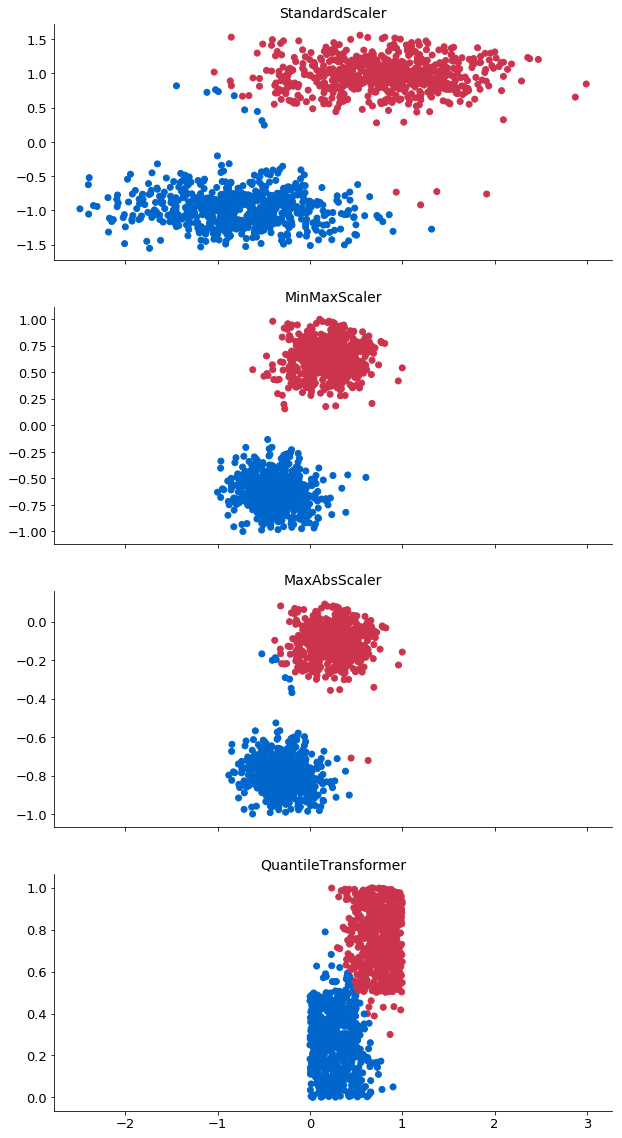

In [15]:
from sklearn import preprocessing

f, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

scalers=[
        preprocessing.StandardScaler(),
        preprocessing.MinMaxScaler(feature_range=(-1, 1)),
        preprocessing.MaxAbsScaler(),
        preprocessing.QuantileTransformer()
]

for scaler, ax in zip(scalers, axs):
    X_prime = scaler.fit_transform(X)
    prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X_prime)
    ax.set_title(scaler.__class__.__name__)
    ax.scatter(X_prime[:, 0], X_prime[:, 1], c=prediction, cmap=discrete_cmap)
    
None

### Image Compression Using k-Means

For a typical color, or RGB,  image the value for each color component must be stored. It is basically a list of color vectors 

$$
c_i = \begin{pmatrix} R, G, B \end{pmatrix}
$$

For a $420 \times 640$ pixel image that results in  $420 \cdot 640 \cdot 3 \cdot 2  \; \text{byte} = 1.6128 \;  \text{megabyte}$ of memory.
This is how a typical Bitmap Image works.

The GIF format allows the compression of color information.  

In the example below we use k-Means to compress the color information of an image. We cluster the space of color components (either RGB, HSV or similar)into $k$ cluster centroids. 
Then only the association of each pixel to the clsuter centroids and the centroids themselves have to be stored. 

When clustering the colors of an image into $k=50$ centroids for example  we only need to store $(420 \cdot 640 + k) \cdot 2  \; \text{byte} = 537.7 \; \text{kilobyte}$




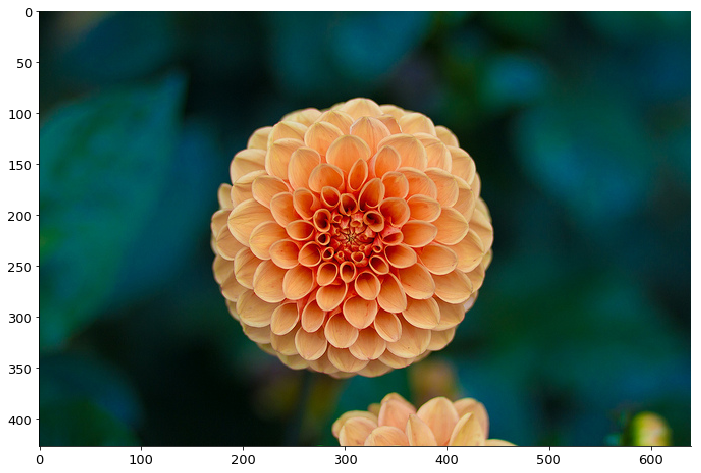

In [16]:
from sklearn.datasets import load_sample_image
from skimage import color

#load an example image as a 3D array
image = load_sample_image("flower.jpg")
image = np.array(image, dtype=np.float64) / 255

#store width length and number of colors
width, length, d = image.shape  

# show image
plt.imshow(image)

#convert image to hsv for nicer plots
image_hsv = color.rgb2hsv(image)

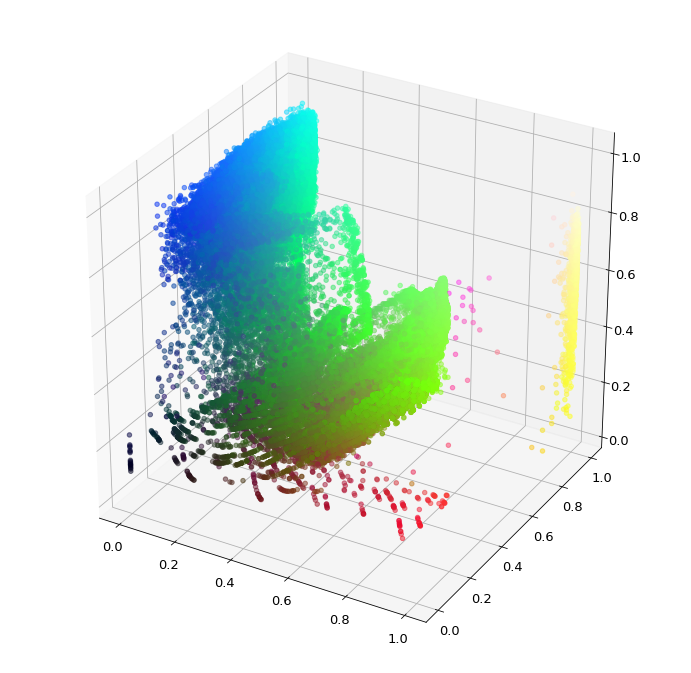

In [17]:
from mpl_toolkits import mplot3d

# plot H, V and S values of each pixel into a 3D coordinate system.

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter3D(image_hsv[:, :, 0], image_hsv[:, :, 1], image_hsv[:, :, 2], c=image_hsv.reshape(-1, 3), alpha=0.5)
None

In [18]:
from sklearn.utils import resample

# perform k-means on a small random sample of pixels
# we could use all pixels here but it would take much too long.
# we reshape the image into a 2D array for resampling and k-means fitting
flattened_image = image_hsv.reshape(-1, 3)
sample = resample(flattened_image, n_samples=1000, replace=False)

# get the desired number of clsuter centers
kmeans = KMeans(n_clusters = 50).fit(sample)
centroids = kmeans.cluster_centers_

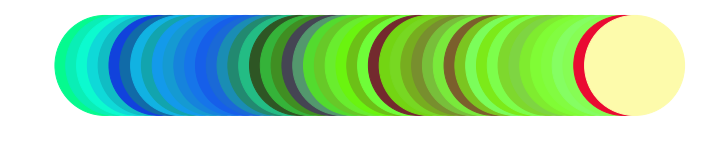

In [19]:
# sort centroids by hue to visualize the new colors.
idx = np.argsort(centroids[:, 0])

plt.figure(figsize=(12, 2))
plt.scatter(np.linspace(0, 1, len(idx)), np.ones_like(idx),  c=centroids[idx], s=10000)
plt.axis('off')
None

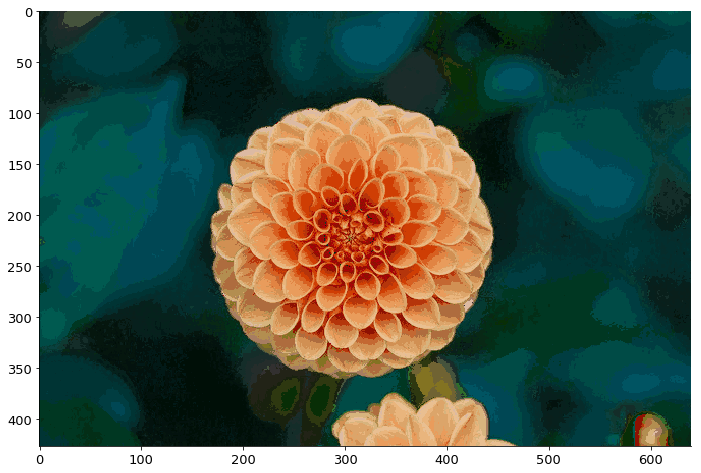

In [20]:
# associate each pixel with the number of a cluster (i.e. the nearest centroid/color)
labels = kmeans.predict(flattened_image)

# get the actual value for each cluster centroid and reshape into a 3D image
reconstructed  = centroids[labels].reshape(width, length, d)

# convert to RGB and plot again.
plt.imshow(color.hsv2rgb(reconstructed))

## Density Based Clustering

K-Means only takes distances between neighbours into acount. This works well for concave distributions that are approximately round in shape. Below you'll find another example where k-Means fails miserably. The moons are neither round nor convex yet easily seperated into clusters by eye. A simple transformation will not help in this case.

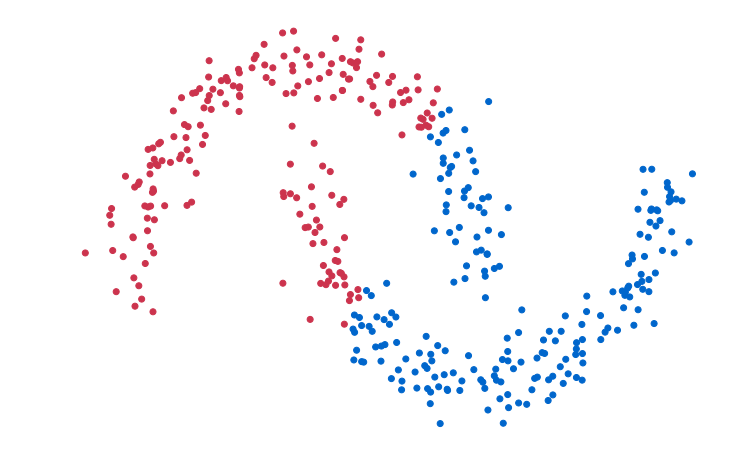

In [21]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=400, noise=0.1)
prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
plt.axis('off')
None

### DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a clsutering method based on the density of different regions within the parameter space. It clsuters together points within regions of high density and labels points as outliers that do not lie within a dense region.

1. Start by selecting *core points*. These are all points that have at least $m$ points in their neighbourhood region of radius $\epsilon$.

2. For each core point find connected points to build a cluster $C$. A point is connected to $C$ if its within the $\epsilon$  neighbourhood of any point in $C$ and is also a core point.

3. Assign each point which is not a core point to the nearest cluster with distance being at most $\epsilon$ 



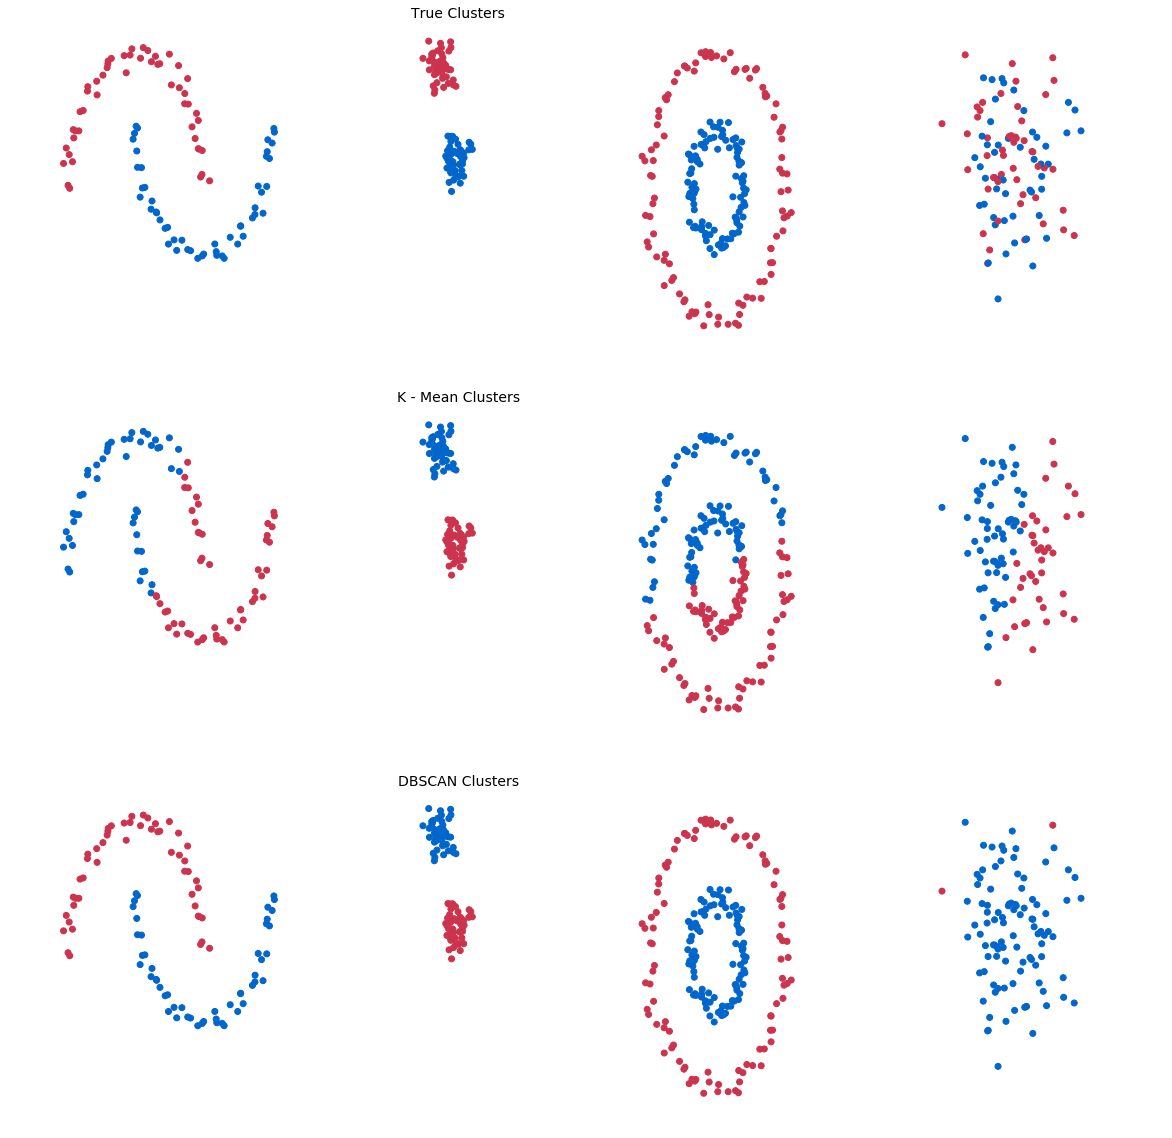

In [22]:
from sklearn.datasets import make_moons, make_checkerboard, make_circles
from sklearn.cluster import DBSCAN

f, [top, center, bottom] = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(20, 20))

X_moon, y_moon = make_moons(noise=0.05, random_state=0)
X_circle, y_circle = make_circles(noise=0.05, factor=0.4, random_state=0, n_samples=200)
X_blobs, y_blobs = make_blobs(centers=2, center_box=(-0.5, 0.5), cluster_std=0.4, random_state=0)
X_long, y_long = make_blobs(centers=2, center_box=(-2.1, 2.1), cluster_std=0.1, random_state=0)

data = [(X_moon, y_moon), (X_long, y_long), (X_circle, y_circle), (X_blobs, y_blobs)]

for ax, (X, y) in zip(top, data):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=discrete_cmap)
    ax.axis('off')
    
for ax, (X, y) in zip(center, data):
    prediction = KMeans(n_clusters=2, random_state=0).fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
    ax.axis('off')
    
for ax, (X, y) in zip(bottom, data):
    prediction = DBSCAN(eps=0.339).fit_predict(X)
    ax.scatter(X[:, 0], X[:, 1], c=prediction, cmap=discrete_cmap)
    ax.axis('off')
    
top[1].set_title('True Clusters')
center[1].set_title('K - Mean Clusters')
bottom[1].set_title('DBSCAN Clusters')
None

### Evaluating Cluster Performance

In the case of unsupervised learning there is no ground truth to which the cluster structure can be compared. 

Some heuristic has to be applied measure how well a clustering performed. 

#### Silhuette Coefficent 

This evaluation ciriterion assumes a clsutering is 'good' if the clusters are dense instead of sparse. 

Define $a$ as the distance between a single point $x_0$ and all other points in the cluster $S_p$.

$$
a(x_0) = \sum_{x_i \in S_0} \left\|x_i - x_0 \right\|
$$

and $b$ as the distance between $x_0$ and all the points in the *nearest cluster* $S_p^\prime$

$$
b(x_0) = \sum_{x_i \in S_0^\prime} \left\|x_i - x_0 \right\|
$$

The Silhuette Coefficent is then defined as 

$$
s = \frac{b - a}{\text{max}(a, b)}
$$


The coefficent takes a value close to +1 for dense clustering and -1 for sparse clusters. 

Unfortunately it doesn't work very reliable.

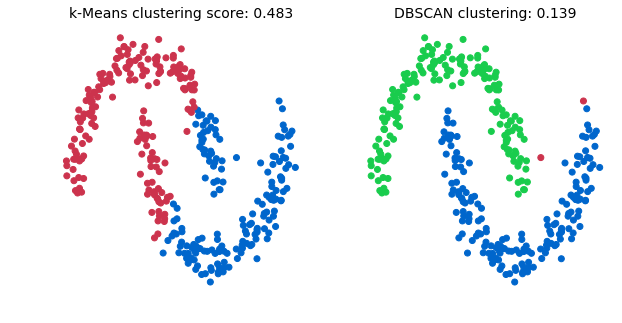

In [35]:
from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=360, noise=0.09, random_state=172)

km = KMeans(n_clusters=2)
prediction_kmeans = km.fit_predict(X)
score_kmeans = silhouette_score(X, km.labels_ ) 

db = DBSCAN(eps=0.18)
prediction_db = db.fit_predict(X)
score_db = silhouette_score(X, db.labels_ ) 

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
ax1.set_title('k-Means clustering score: {:0.3f}'.format(score_kmeans))
ax1.scatter(X[:, 0], X[:, 1], c=prediction_kmeans, cmap=discrete_cmap)
ax1.axis('off')

ax2.set_title('DBSCAN clustering: {:0.3f}'.format(score_db))
ax2.scatter(X[:, 0], X[:, 1], c=prediction_db, cmap=discrete_cmap)
ax2.axis('off')
None